In [40]:
import sys
import time
import random

#Implement in Python your algorithm designed using dynamic programming,
#to solve the agricultural robotics problem.


In [90]:
def PWMW(A,numOfRows,numOfCols):
  S = [[0 for x in range(numOfCols+1)] for x in range(numOfRows+1)]

  for d in range(1,numOfRows+1): 
    for e in range(1,numOfCols+1):
      if S[d-1][e] > S[d][e-1]:
        S[d][e] = S[d-1][e] + A[d-1][e-1]
      else:
        S[d][e] = S[d][e-1] + A[d-1][e-1];

  #print('\n'.join([''.join(['{:3}'.format(item) for item in row]) for row in S]))
  numOfWeeds = S[numOfRows][numOfCols]

  path = []

  i = numOfRows
  j = numOfCols

  while (i != 0 and j != 0):

      if S[i][j-1] > S[i-1][j]: # left cell > upper cell
        path.append((i,j)) # add current cell to the path
        j -= 1 # go left

      else: # left cell = upper cell OR upper cell > left cell
        path.append((i,j)) # add current cell to the path
        if i - 1 > 0:   # if the upper cell is a navigable cell.
          i -= 1 # go up
        else: # go left if the upper cell is not navigable
          j -= 1 # go left

  path = path[::-1]
  return path



#Experimental evaluations of your algorithm: plot the results in a graph, and
#discuss the results (e.g., are they expected or surprising? why?)

#Create a random matrix with the given number of rows and the coloumns.

In [89]:
def settleWeeds(rows, cols):
  mat = [[0 for _ in range(cols)] for _ in range(rows)]
  numOfWeeds = int((rows*cols)/2)
  #print(type(numOfWeeds), numOfWeeds)
  for i in range(numOfWeeds):

    row = random.randint(0, rows-1)
    col = random.randint(0, cols-1)

    unique = mat[row][col] != 1
    while unique == 0:
      row = random.randint(0, rows-1)
      col = random.randint(0, cols-1)
      unique = mat[row][col] != 1 
      
    mat[row][col] = 1
  return mat

#Measure the execution times for the input sizes mxn = 1000, 2000 to 3000 and store them


In [43]:
times = []
a_list = [20, 40, 60, 80, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
b_list = [50, 50, 50, 50, 100,100,100,100,100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
for i in range(30):
  rows = a_list[i]
  cols = b_list[i]
  A = settleWeeds(rows,cols)
  start = time.time()
  PWMW(A,rows,cols)
  end = time.time()
  times.append(end-start)
print(times)

[0.0008552074432373047, 0.001001119613647461, 0.0014417171478271484, 0.0019011497497558594, 0.0028116703033447266, 0.0028302669525146484, 0.0032205581665039062, 0.0037038326263427734, 0.0041735172271728516, 0.008019447326660156, 0.005095720291137695, 0.0055849552154541016, 0.0077135562896728516, 0.00671076774597168, 0.006958723068237305, 0.007443428039550781, 0.008351564407348633, 0.008262157440185547, 0.008955717086791992, 0.009379148483276367, 0.010820388793945312, 0.010539054870605469, 0.010679483413696289, 0.01100778579711914, 0.011556863784790039, 0.012541532516479492, 0.012654781341552734, 0.013367176055908203, 0.013399600982666016, 0.014148712158203125]


# Plot the results coming from the above cell.

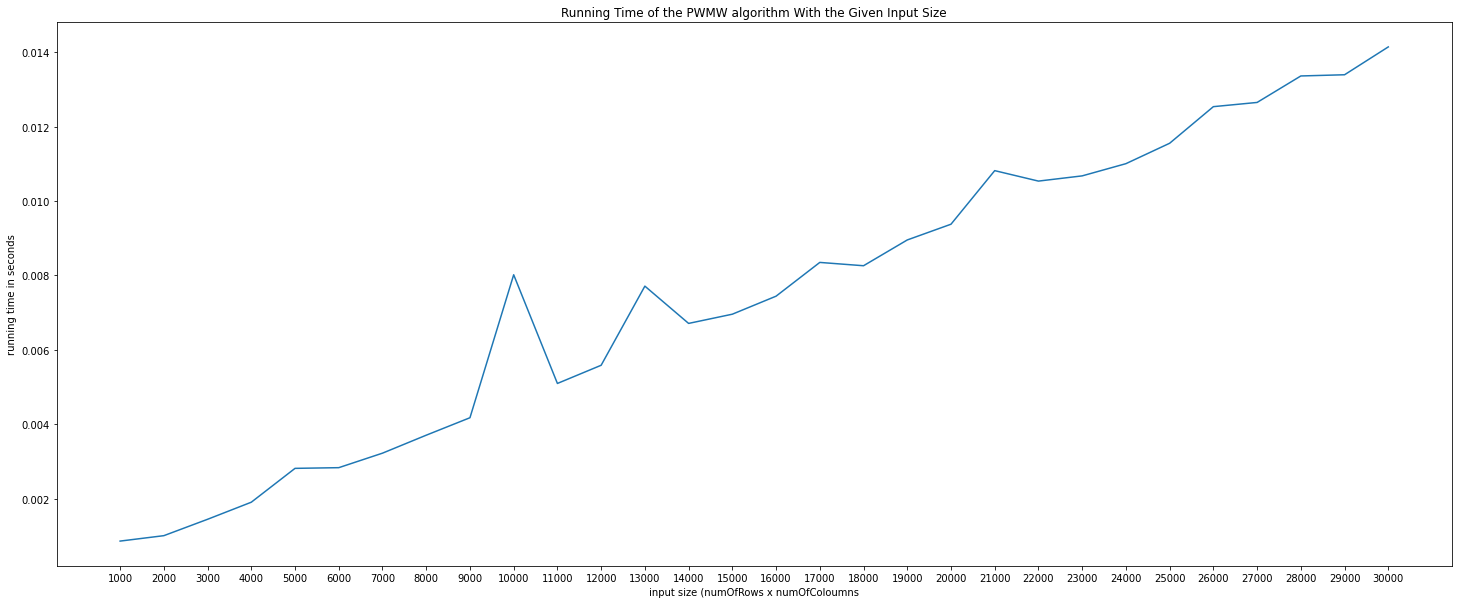

In [44]:
import matplotlib.pyplot as plt
liste = [1000*i for i in range(31)]
list_string = map(str, liste[1:])
x_axis = list(list_string)
y_axis = times # corresponding y axis values

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

# plotting the points 
plt.plot(x_axis, y_axis)
  
# naming the x axis
plt.xlabel('input size (numOfRows x numOfColoumns')
# naming the y axis
plt.ylabel('running time in seconds')
  
# giving a title to my graph
plt.title('Running Time of the PWMW algorithm With the Given Input Size')

# function to show the plot
plt.show()

#Create a benchmark suite of at least 5 instances to test the correctness of your
#Python program: take into account the functional testing methods (e.g., white
#box and black box testing) while constructing the instances, and test your programs with these instances

## Black Box Testing

1. There is only one cell.

In [ ]:
A = [[0]]
PWMW(A,1,1)

[(1, 1)]

In [ ]:
A = [[1]]
PWMW(A,1,1)

[(1, 1)]

2. All the cells have weed.


In [ ]:
A = [[1 for _ in range(5)] for _ in range(4)]
print('\n'.join([''.join(['{:3}'.format(item) for item in row]) for row in A]))
print("\n")
PWMW(A,4,5)

  1  1  1  1  1
  1  1  1  1  1
  1  1  1  1  1
  1  1  1  1  1


  0  0  0  0  0  0
  0  1  2  3  4  5
  0  2  3  4  5  6
  0  3  4  5  6  7
  0  4  5  6  7  8


[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5)]

3. None of the cells have weed.


In [ ]:
A = [[0 for _ in range(5)] for _ in range(4)]
print('\n'.join([''.join(['{:3}'.format(item) for item in row]) for row in A]))
print("\n")
PWMW(A,4,5)

  0  0  0  0  0
  0  0  0  0  0
  0  0  0  0  0
  0  0  0  0  0


  0  0  0  0  0  0
  0  0  0  0  0  0
  0  0  0  0  0  0
  0  0  0  0  0  0
  0  0  0  0  0  0


[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5)]

4. All the weeds are aligned on an edge.


In [ ]:
A = [[1, 0, 0, 0, 0, 0], 
     [1, 0, 0, 0, 0, 0], 
     [1, 0, 0, 0, 0, 0],
     [1, 0, 0, 0, 0, 0],
     [1, 0, 0, 0, 0, 0]]
print("\n")
PWMW(A,5,6)



  0  0  0  0  0  0  0
  0  1  1  1  1  1  1
  0  2  2  2  2  2  2
  0  3  3  3  3  3  3
  0  4  4  4  4  4  4
  0  5  5  5  5  5  5


[(1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6)]

In [ ]:
A = [[1, 1, 1, 1, 1, 1], 
     [0, 0, 0, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]
print("\n")
PWMW(A,5,6)



  0  0  0  0  0  0  0
  0  1  2  3  4  5  6
  0  1  2  3  4  5  6
  0  1  2  3  4  5  6
  0  1  2  3  4  5  6
  0  1  2  3  4  5  6


[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 6),
 (3, 6),
 (4, 6),
 (5, 6)]

In [ ]:
A = [[0, 0, 0, 0, 0, 1], 
     [0, 0, 0, 0, 0, 1], 
     [0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 1]]
print("\n")
PWMW(A,5,6)



  0  0  0  0  0  0  0
  0  0  0  0  0  0  1
  0  0  0  0  0  0  2
  0  0  0  0  0  0  3
  0  0  0  0  0  0  4
  0  0  0  0  0  0  5


[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 6),
 (3, 6),
 (4, 6),
 (5, 6)]

In [ ]:
A = [[0, 0, 0, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [1, 1, 1, 1, 1, 1]]
print("\n")
PWMW(A,5,6)



  0  0  0  0  0  0  0
  0  0  0  0  0  0  0
  0  0  0  0  0  0  0
  0  0  0  0  0  0  0
  0  0  0  0  0  0  0
  0  1  2  3  4  5  6


[(1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6)]

5. Matrix is 1 x m.


In [ ]:
A = [[0, 0, 0, 0, 0, 0]]
print("\n")
PWMW(A,1,6)



  0  0  0  0  0  0  0
  0  0  0  0  0  0  0


[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]

In [ ]:
A = [[1, 1, 1, 1, 1, 1]]
print("\n")
PWMW(A,1,6)



  0  0  0  0  0  0  0
  0  1  2  3  4  5  6


[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]

In [ ]:
A = [[0, 1, 1, 1, 1, 0]]
print("\n")
PWMW(A,1,6)



  0  0  0  0  0  0  0
  0  0  1  2  3  4  4


[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]

6. Matrix is n x 1.

In [ ]:
A = [[0],
     [1], 
     [1],
     [0],
     [1], 
     [0]]
print("\n")
PWMW(A,6,1)



  0  0
  0  0
  0  1
  0  2
  0  2
  0  3
  0  3


[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

In [ ]:
A = [[1],
     [1], 
     [1],
     [1],
     [1], 
     [1]]
print("\n")
PWMW(A,6,1)



  0  0
  0  1
  0  2
  0  3
  0  4
  0  5
  0  6


[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

In [ ]:
A = [[0],
     [0], 
     [0],
     [0],
     [0], 
     [0]]
print("\n")
PWMW(A,6,1)



  0  0
  0  0
  0  0
  0  0
  0  0
  0  0
  0  0


[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

7. Matrix is 2 x 2.

In [ ]:
A = [[0, 0],
     [0, 0]] 

print("\n")
PWMW(A,2,2)




  0  0  0
  0  0  0
  0  0  0


[(1, 1), (1, 2), (2, 2)]

In [ ]:
A = [[1, 0],
     [0, 1]] 

print("\n")
PWMW(A,2,2)




  0  0  0
  0  1  1
  0  1  2


[(1, 1), (1, 2), (2, 2)]

In [ ]:
A = [[0, 1],
     [1, 0]] 

print("\n")
PWMW(A,2,2)




  0  0  0
  0  0  1
  0  1  1


[(1, 1), (1, 2), (2, 2)]

8. Matrix has weeds diagonally.

In [ ]:
A = [[1, 0, 0, 0, 0], 
     [0, 1, 0, 0, 0], 
     [0, 0, 1, 0, 0],
     [0, 0, 0, 1, 0],
     [0, 0, 0, 0, 1]]
print("\n")
PWMW(A,5,5)



  0  0  0  0  0  0
  0  1  1  1  1  1
  0  1  2  2  2  2
  0  1  2  3  3  3
  0  1  2  3  4  4
  0  1  2  3  4  5


[(1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4), (4, 5), (5, 5)]

In [ ]:
A = [[0, 0, 0, 0, 0], 
     [0, 1, 0, 0, 0], 
     [0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0]]
print("\n")
PWMW(A,5,5)



  0  0  0  0  0  0
  0  0  0  0  0  0
  0  0  1  1  1  1
  0  0  1  1  1  1
  0  0  1  1  2  2
  0  0  1  1  2  2


[(1, 1), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (5, 5)]

9. The Matrix has only one weed on the left bottom corner.

In [ ]:
A = [[0, 0, 0, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [1, 0, 0, 0, 0, 0]]
print("\n")
PWMW(A,5,6)




  0  0  0  0  0  0  0
  0  0  0  0  0  0  0
  0  0  0  0  0  0  0
  0  0  0  0  0  0  0
  0  0  0  0  0  0  0
  0  1  1  1  1  1  1


[(1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6)]

In [ ]:
A = [[1, 0, 0, 0, 0, 0], 
     [1, 1, 0, 0, 0, 0], 
     [1, 1, 1, 0, 0, 0],
     [1, 1, 1, 1, 0, 0],
     [1, 1, 1, 1, 1, 0]]

print("\n")
PWMW(A,5,6)



  0  0  0  0  0  0  0
  0  1  1  1  1  1  1
  0  2  3  3  3  3  3
  0  3  4  5  5  5  5
  0  4  5  6  7  7  7
  0  5  6  7  8  9  9


[(1, 1),
 (2, 1),
 (2, 2),
 (3, 2),
 (3, 3),
 (4, 3),
 (4, 4),
 (5, 4),
 (5, 5),
 (5, 6)]

In [ ]:
A = [[0, 1, 0, 1, 0, 1], 
     [1, 0, 1, 0, 1, 0], 
     [0, 1, 0, 1, 0, 1],
     [1, 0, 1, 0, 1, 0],
     [0, 1, 0, 1, 0, 1]]

print("\n")
PWMW(A,5,6)



  0  0  0  0  0  0  0
  0  0  1  1  2  2  3
  0  1  1  2  2  3  3
  0  1  2  2  3  3  4
  0  2  2  3  3  4  4
  0  2  3  3  4  4  5


[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 6),
 (3, 6),
 (4, 6),
 (5, 6)]

In [ ]:
A = [[0, 0, 0, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

In [11]:
A = [[1, 0, 1, 0, 0, 0], 
     [0, 1, 0, 1, 0, 0], 
     [0, 1, 1, 0, 0, 0],
     [0, 0, 0, 0, 1, 0],
     [1, 0, 1, 0, 0, 1]]


print("\n")
PWMW(A,5,6)

[(1, 1),
 (1, 2),
 (2, 2),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (4, 5),
 (4, 6),
 (5, 6)]

In [ ]:
A = [[0, 0, 1, 0, 0, 0], 
     [0, 1, 0, 1, 0, 0], 
     [0, 1, 1, 0, 0, 0],
     [0, 0, 0, 0, 1, 0],
     [1, 0, 1, 0, 0, 1]]


print("\n")
PWMW(A,5,6)



  0  0  0  0  0  0  0
  0  0  0  1  1  1  1
  0  0  1  1  2  2  2
  0  0  2  3  3  3  3
  0  0  2  3  3  4  4
  0  1  2  4  4  4  5


[(1, 1),
 (1, 2),
 (2, 2),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (4, 5),
 (4, 6),
 (5, 6)]

In [ ]:
A = [[0, 0, 1, 0, 0, 0], 
     [0, 1, 0, 1, 0, 0], 
     [0, 1, 1, 0, 0, 0],
     [0, 0, 0, 0, 1, 0],
     [1, 0, 1, 0, 0, 0]]


print("\n")
PWMW(A,5,6)



  0  0  0  0  0  0  0
  0  0  0  1  1  1  1
  0  0  1  1  2  2  2
  0  0  2  3  3  3  3
  0  0  2  3  3  4  4
  0  1  2  4  4  4  4


[(1, 1),
 (1, 2),
 (2, 2),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (4, 5),
 (4, 6),
 (5, 6)]

#White Box Testing


In [24]:
def PWMW(A,numOfRows,numOfCols):
  S = [[0 for x in range(numOfCols+1)] for x in range(numOfRows+1)]

  for d in range(1,numOfRows+1): 
    for e in range(1,numOfCols+1):
      if S[d-1][e] > S[d][e-1]:
        print("Test case 1: the upper cell is bigger than the left cell in matrix S")
        S[d][e] = S[d-1][e] + A[d-1][e-1]
      else:
        S[d][e] = S[d][e-1] + A[d-1][e-1]
        if S[d-1][e] < S[d][e-1]:
          print("Test case 2: the left cell is bigger than the upper cell in the matrix S")
        else:
          print("Test case 3: the left cell and the upper cell are equal to each other in the matrix S")

  print('\n'.join([''.join(['{:3}'.format(item) for item in row]) for row in S]))
  numOfWeeds = S[numOfRows][numOfCols]

  path = []

  i = numOfRows
  j = numOfCols

  while (i != 0 and j != 0):

      if S[i][j-1] > S[i-1][j]: # left cell > upper cell
        path.append((i,j)) # add current cell to the path
        j -= 1 # go left
        print("Test case 4: The left cell is bigger than the upper cell")

      else: # left cell = upper cell OR upper cell > left cell
        path.append((i,j)) # add current cell to the path
        print("Test case 5: The upper cell is bigger than the left cell OR they are equal to each other")
        if S[i-1][j] > S[i][j-1]: # if the upper cell is bigger than the left cell
          print("Test case 6: The upper cell is bigger than the left cell")
          i -= 1 # go up
        else:
          print("Test case 7: The upper cell and the left cell are equal to each other")
          if i - 1 > 0: # if the upper cell is navigable
            print("Test case 8: The upper cell and the left cell are equal to each other and the upper cell is navigable")
            i -= 1 # go up
          else:
            print("Test case 9: The upper cell and the left cell are equal to each other but the upper cell is NOT navigable")
            j -= 1 # go left
  path = path[::-1]
  return path

In [25]:
A  =[[1,1,0],
     [0,0,0],
     [1,1,0]]

print("\n")
PWMW(A,3,3)



Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 2: the left cell is bigger than the upper cell in the matrix S
Test case 2: the left cell is bigger than the upper cell in the matrix S
Test case 1: the upper cell is bigger than the left cell in matrix S
Test case 1: the upper cell is bigger than the left cell in matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 1: the upper cell is bigger than the left cell in matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 2: the left cell is bigger than the upper cell in the matrix S
  0  0  0  0
  0  1  2  2
  0  1  2  2
  0  2  3  3
Test case 4: The left cell is bigger than the upper cell
Test case 5: The upper cell is bigger than the upper cell OR they are equal to each other
Test case 7: The upper cell and the left cell are equal to each other
Test case 8: The upper cell and the left cell

[(1, 1), (1, 2), (2, 2), (3, 2), (3, 3)]

In [29]:
rows = 6
cols= 5
A = settleWeeds(rows,cols)
print('\n'.join([''.join(['{:3}'.format(item) for item in row]) for row in A]))
print("\n")
PWMW(A,rows,cols)

  0  1  0  1  1
  1  0  0  0  1
  0  1  0  1  0
  1  0  1  1  1
  0  1  1  0  1
  0  0  0  1  0


Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 2: the left cell is bigger than the upper cell in the matrix S
Test case 2: the left cell is bigger than the upper cell in the matrix S
Test case 2: the left cell is bigger than the upper cell in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 1: the upper cell is bigger than the left cell in matrix S
Test case 1: the upper cell is bigger than the left cell in matrix S
Test case 1: the upper cell is bigger than the left cell in matrix S
Test case 3: the left cell and the upper cell 

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 5),
 (3, 5),
 (4, 5),
 (5, 5),
 (6, 5)]

In [30]:
rows = 4
cols= 4
A = settleWeeds(rows,cols)
print('\n'.join([''.join(['{:3}'.format(item) for item in row]) for row in A]))
print("\n")
PWMW(A,rows,cols)

  0  1  1  0
  0  1  0  1
  1  0  1  1
  0  0  0  1


Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 2: the left cell is bigger than the upper cell in the matrix S
Test case 2: the left cell is bigger than the upper cell in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 1: the upper cell is bigger than the left cell in matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 1: the upper cell is bigger than the left cell in matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to e

[(1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]

In [31]:
A=[[1]]
print("\n")
PWMW(A,1,1)




Test case 3: the left cell and the upper cell are equal to each other in the matrix S
  0  0
  0  1
Test case 5: The upper cell is bigger than the upper cell OR they are equal to each other
Test case 7: The upper cell and the left cell are equal to each other
Test case 9: The upper cell and the left cell are equal to each other but the upper cell is NOT navigable


[(1, 1)]

In [32]:
A=[]
print("\n")
PWMW(A,0,0)



  0


[]

In [33]:
A=[[0]]
print("\n")
PWMW(A,1,1)



Test case 3: the left cell and the upper cell are equal to each other in the matrix S
  0  0
  0  0
Test case 5: The upper cell is bigger than the upper cell OR they are equal to each other
Test case 7: The upper cell and the left cell are equal to each other
Test case 9: The upper cell and the left cell are equal to each other but the upper cell is NOT navigable


[(1, 1)]

In [35]:
A=[[0,0,0,0,0],
   [0,0,0,0,0],
   [0,0,0,0,0]]
print("\n")
PWMW(A,3,5)



Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are equal to each other in the matrix S
Test case 3: the left cell and the upper cell are eq

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5)]

#Create a benchmark suite to test the performance of your Python programs:
#construct instances of different sizes (e.g., relative to the number of levels),
#evaluate the performance of your program in terms of computation times, and
#plot the results within a graph.

Create 20 instances of 20x50 random matrices.

In [95]:
times = []
a_list = [20, 40, 60, 80, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
b_list = [50, 50, 50, 50, 100,100,100,100,100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
for i in range(30):
  times.append([])
  for j in range(20):
    rows = a_list[i]
    cols = b_list[i]
    A = settleWeeds(rows,cols)
    start = time.time()
    PWMW(A,rows,cols)
    end = time.time()
    times[i].append(end-start)
print(times)

[[0.0013439655303955078, 0.0008642673492431641, 0.0008258819580078125, 0.0008606910705566406, 0.0005116462707519531, 0.0005080699920654297, 0.0005128383636474609, 0.00047898292541503906, 0.0005166530609130859, 0.0004956722259521484, 0.0005257129669189453, 0.0004932880401611328, 0.0004830360412597656, 0.0005037784576416016, 0.0004885196685791016, 0.0004863739013671875, 0.00048804283142089844, 0.0005311965942382812, 0.0005164146423339844, 0.0005283355712890625], [0.0009720325469970703, 0.0009889602661132812, 0.0009753704071044922, 0.0009484291076660156, 0.0009918212890625, 0.0010766983032226562, 0.0009734630584716797, 0.0010106563568115234, 0.0010137557983398438, 0.0009617805480957031, 0.0011644363403320312, 0.0009706020355224609, 0.0010066032409667969, 0.0009832382202148438, 0.0009784698486328125, 0.001196146011352539, 0.0009684562683105469, 0.0013470649719238281, 0.0009682178497314453, 0.0009951591491699219], [0.0014336109161376953, 0.0014352798461914062, 0.0014138221740722656, 0.00141

In [96]:
print(len(times))
for a in times:
  print(len(a))

30
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [97]:
y_axis_for_perf_testing = []
for a in times:
  y_axis_for_perf_testing.append(sum(a)/20)
print(y_axis_for_perf_testing)

[0.0005981683731079102, 0.0010245680809020997, 0.0014876723289489746, 0.0020768046379089355, 0.0024795770645141602, 0.003016841411590576, 0.0034161686897277834, 0.0039228320121765135, 0.0043343305587768555, 0.004633903503417969, 0.005446016788482666, 0.00562814474105835, 0.006426000595092773, 0.006568706035614014, 0.007028126716613769, 0.007696688175201416, 0.00812845230102539, 0.00873492956161499, 0.009118545055389404, 0.009936833381652832, 0.01070997714996338, 0.010214650630950927, 0.01111011505126953, 0.011250030994415284, 0.011780631542205811, 0.012280666828155517, 0.013120973110198974, 0.01346733570098877, 0.01390385627746582, 0.014653241634368897]


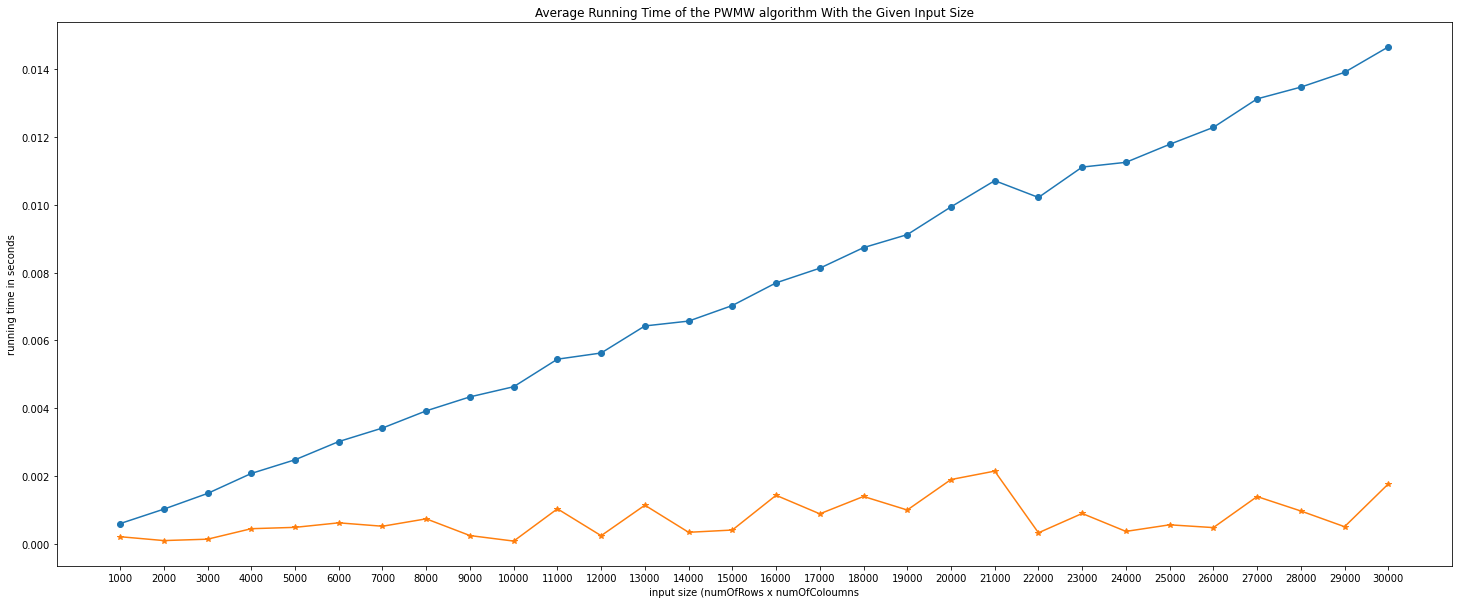

In [101]:
import numpy as np

liste = [1000*i for i in range(31)]
list_string = map(str, liste[1:])
x_axis = list(list_string)
y_axis_for_perf_testing_mean = []
y_axis_for_perf_testing_sd = []
for a in times:
  y_axis_for_perf_testing_mean.append(sum(a)/20)
  y_axis_for_perf_testing_sd.append(np.std(a))

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

# plotting the points 
plt.plot(x_axis, y_axis_for_perf_testing_mean,marker='o',label='mean')
plt.plot(x_axis, y_axis_for_perf_testing_sd ,marker='*',label='std')
# naming the x axis
plt.xlabel('input size (numOfRows x numOfColoumns')
# naming the y axis
plt.ylabel('running time in seconds')
  
# giving a title to my graph
plt.title('Average Running Time of the PWMW algorithm With the Given Input Size')

# function to show the plot
plt.show()

# Compute the estimated standart errors for each 20 instances

In [99]:
standard_errors = []
for c in y_axis_for_perf_testing_sd:
  sm = c / 20 ** (0.5)
  standard_errors.append(sm)
print(standard_errors,len(standard_errors))

[4.725311253736079e-05, 2.180385338151054e-05, 3.095365960224761e-05, 0.00010013515448785856, 0.00010896364468446635, 0.0001387685385712061, 0.0001163183559736822, 0.00016515961874884064, 5.4837684250381985e-05, 1.8404053497631186e-05, 0.00023116383179728952, 5.400705068658575e-05, 0.0002550291751062649, 7.633214470170415e-05, 9.12839978325254e-05, 0.00032031894033174497, 0.00019813459439563242, 0.0003126595282144115, 0.00022335321274197497, 0.00042430378635717236, 0.00047976113987775217, 7.30549293781192e-05, 0.00020047514200400318, 8.231492766268037e-05, 0.00012570771516118715, 0.00010739705259052867, 0.00031202292491637105, 0.00021687497668200893, 0.00011329931087512753, 0.0003951475411116633] 30


#I want 95% confidence interval. From t table: t = 2.093

In [102]:
ci_list = []
for k in range(30):
    ci_1 = y_axis_for_perf_testing_mean[k] + 2.093 * standard_errors[k]
    ci_2 = y_axis_for_perf_testing_mean[k] - 2.093 * standard_errors[k]
    ci_list.append((ci_1, ci_2))
print(ci_list)
print(len(ci_list))

[(0.0006970691376486063, 0.000499267608567214), (0.0010702035460296013, 0.000978932615774598), (0.001552458338496479, 0.0014228863194014703), (0.0022863875162520233, 0.0018672217595658476), (0.0027076379728387485, 0.002251516156189572), (0.0033072839628201104, 0.0027263988603610416), (0.0036596230087807004, 0.0031727143706748663), (0.004268511094217837, 0.00357715293013519), (0.004449105831912905, 0.004219555285640806), (0.004672423187388511, 0.004595383819447426), (0.005929842688434393, 0.004962190888530939), (0.005741181498145374, 0.005515107983971326), (0.006959776658590186, 0.00589222453159536), (0.006728469214474681, 0.006408942856753347), (0.007219184124077245, 0.006837069309150293), (0.008367115717315758, 0.0070262606330870735), (0.008543148007095448, 0.007713756594955331), (0.009389325954167752, 0.008080533169062227), (0.009586023329658357, 0.00865106678112045), (0.010824901206498393, 0.00904876555680727), (0.011714117215727515, 0.009705837084199243), (0.01036755459813933, 0.01

#Some denemes. Ignore please

In [46]:
listm = []
count = 0
for i in range(4):
  listm.append([])
  for j in range(3):
    rows = a_list[i]
    cols = b_list[i]
    count+=1
    listm[i].append(count)
print(listm)

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]


In [65]:
import numpy as np
y_axiss = []
y_axiss_sd = []
for a in listm:
  y_axiss.append(sum(a)/3)
  y_axiss_sd.append(np.std(a))

print(y_axiss)
print(y_axiss_sd)
l = [1,2,3]
print(np.std(l))

[2.0, 5.0, 8.0, 11.0]
[0.816496580927726, 0.816496580927726, 0.816496580927726, 0.816496580927726]
0.816496580927726
